## Ausreißer und Boxplots
----------------------------------------

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

### Ausreißer
Bei der Datenanalyse ist die Identifizierung von Ausreißern und damit von Beobachtungen, die deutlich aus dem Gesamtmuster der Daten herausfallen, sehr wichtig. Ein Ausreißer erfordert besondere Aufmerksamkeit. Er kann das Ergebnis eines Mess- oder Aufzeichnungsfehlers, einer Beobachtung aus einer anderen Population oder einer ungewöhnlich extremen Beobachtung sein. Beachten Sie, dass eine extreme Beobachtung nicht zwangsläufig ein Ausreißer sein muss, sondern auch ein Hinweis auf eine Schieflage sein kann (Weiss 2010).

Wenn wir einen Ausreißer beobachten, sollten wir versuchen, seine Ursache zu ermitteln. Ist ein Ausreißer auf einen Mess- oder Aufzeichnungsfehler zurückzuführen oder gehört er aus einem anderen Grund eindeutig nicht zum Datensatz, kann er einfach entfernt werden. Wenn jedoch keine Erklärung für einen Ausreißer ersichtlich ist, ist die Entscheidung, ob er im Datensatz verbleiben soll, eine schwierige Ermessensentscheidung.

Als Diagnoseinstrument zum Aufspüren von Beobachtungen, die Ausreißer sein könnten, können wir Quartile und den **IQR** verwenden. Daher definieren wir die **Untergrenze** und die **Obergrenze** eines Datensatzes. Die untere Grenze ist die Zahl, die $1,5×IQRs$ unter dem ersten Quartil liegt; die obere Grenze ist die Zahl, die $1,5×IQRs$

über dem dritten Quartil liegt. Beobachtungen, die unterhalb der Untergrenze oder oberhalb der Obergrenze liegen, sind potenzielle Ausreißer (Weiss 2010).



$$\text{Untere Grenze}=Q1-1,5×IQR$$

$$\text{Obere Grenze}=Q3+1,5×IQR$$

### Boxplots

 Das Boxplot-Diagramm, auch **Box-and-Whisker-Diagramm** genannt, basiert auf der <a href="https://en.wikipedia.org/wiki/Five-number_summary">Fünf-Zahlen-Zusammenfassung</a> und kann zur grafischen Darstellung von Zentrum und Variation eines Datensatzes verwendet werden. Diese Diagramme wurden von dem Mathematiker <a href="https://en.wikipedia.org/wiki/John_Tukey">John Wilder Tukey</a> erfunden. Es sind mehrere <a href="https://en.wikipedia.org/wiki/Box_plot">Arten von Boxplots</a> gebräuchlich.

Box-and-Whisker-Plots bieten eine grafische Darstellung der Daten anhand von fünf Maßzahlen: dem Median, dem ersten Quartil, dem dritten Quartil sowie dem kleinsten und dem größten Wert des Datensatzes zwischen der unteren und der oberen Grenze. Der Abstand zwischen den verschiedenen Teilen des Kastens zeigt den Grad der Streuung und Schiefe der Daten an. Durch die Erstellung von Box-and-Whisker-Diagrammen können verschiedene Verteilungen miteinander verglichen werden. Es hilft auch, Ausreißer zu erkennen (Mann 2012). Box-Plots können entweder horizontal oder vertikal gezeichnet werden.

<br> <br> 
![Alt-Text](boxplot.png) <br> <br> 
Die Ränder der Box sind immer das erste und dritte Quartil, und der Bereich innerhalb der Box ist immer das zweite Quartil (der Median). Die von den Boxen ausgehenden Linien (Whisker) zeigen die Variabilität außerhalb des oberen und unteren Quartils an. Um einen Boxplot zu erstellen, benötigen wir auch das Konzept der benachbarten Werte. Die **angrenzenden Werte** eines Datensatzes sind die extremsten Beobachtungen, die noch innerhalb der unteren und oberen Grenzen liegen; sie sind die extremsten Beobachtungen, die keine potenziellen Ausreißer sind. Ausreißer können als einzelne Punkte aufgetragen werden. Wenn es in einem Datensatz keine potenziellen Ausreißer gibt, sind die angrenzenden Werte lediglich das Minimum und das Maximum der Beobachtungen (Weiss 2010).

Lassen Sie uns nun eine Reihe von Boxplots erstellen, um den Datensatz `students` eingehender zu analysieren. Wir beginnen mit der Erstellung eines Boxplots für die Variable `nc.score`.

In [24]:
# Lese Datei students.csv als Dataframe ein;
# nur Spalten 'nc.score','semester','gender','height' werden verwendet
boxplots = pd.read_csv('students.csv', usecols=['nc.score','semester','gender','height'])
boxplots

,gender,height,nc.score,semester
1,Female,160,1.91,1st
2,Female,172,1.56,2nd
3,Female,168,1.24,3rd
4,Male,183,1.37,2nd
5,Female,175,1.46,1st
...,...,...,...,...
8235,Male,181,2.91,6th
8236,Male,178,2.03,2nd
8237,Female,169,3.72,3rd
8238,Male,195,2.74,4th


{'whiskers': [<matplotlib.lines.Line2D at 0x23ab2360d60>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab2361300>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab2360a90>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab23618a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab2361b70>],
 'means': []}

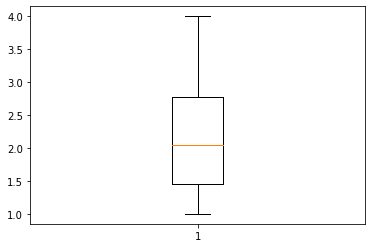

In [25]:
plt.boxplot(boxplots['nc.score'])

Wir erhalten sofort einen Eindruck von der Streuung und Schiefe der Daten. Durch Hinzufügen des Arguments `vert = False` zum Boxplot drehen wir den Boxplot um $90^∘$ und färben die Box ein, um einen besseren visuellen Eindruck zu erhalten.


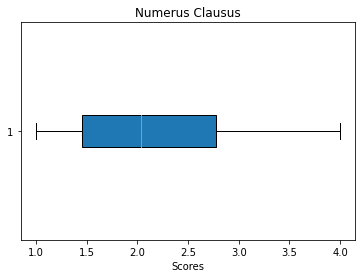

In [26]:
fig, ax = plt.subplots()
plt.boxplot(boxplots['nc.score'], vert = False, patch_artist=True)
ax.set_xlabel('Scores')
ax.set_title('Numerus Clausus')
plt.show()

Boxplots sind eine sehr leistungsfähige Technik für die explorative Datenanalyse, da es sehr einfach ist, die Variable von Interesse, in unserem Fall die `nc.score`-Variable, auf andere Variablen zu beziehen und in ihrer Relation darstellen. In Python können wir das erreichen indem wir `groupby` und die `boxplot` Methode anwenden.  

Zeichnen wir einen Boxplot der Variable `nc.score` in Abhängigkeit von der Variable `semester`. Die `semester`-variable entspricht dem Semester, in dem der jeweilige Student studiert. Zu Ihrer Information: Die Mindeststudienzeit für die untersuchten Studiengänge ist auf 4 Semester festgelegt.

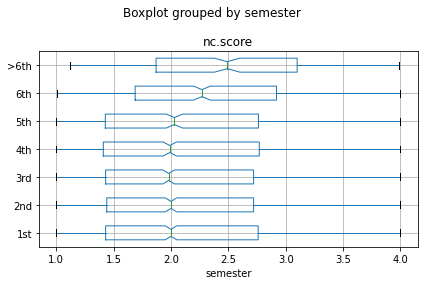

In [27]:
boxplots.boxplot(column = 'nc.score', by = 'semester', vert = False, notch=True)
plt.tight_layout()

Interessant, nicht wahr? Die Grafik zeigt, dass Studierende höherer Semester ($>5$-tes Semester) beim *Numerus clausus* tendenziell schlechter abschneiden. Mit anderen Worten: Studierende, die ihr Studium innerhalb der Mindeststudienzeit abschließen, haben tendenziell eine höhere *Numerus-clausus*-Punktzahl.

Doch damit sind wir noch nicht fertig. Wir wollen wissen, ob das Geschlecht einen Einfluss auf diese Beobachtung hat. Wir können ganz einfach eine Interaktionsvariable einfügen, indem wir die Variable nach den gruppiert werden soll in eckige Klammern setzen : `[var1, var2]`. Außerdem verwenden wir das Argument `notch` in der `boxplot` Methode. Wenn sich die notches zweier Diagramme nicht überschneiden, ist dies ein "starker Beweis" dafür, dass sich die beiden Mediane unterscheiden <a href="https://fu-berlin.primo.exlibrisgroup.com/discovery/search?vid=49KOBV_FUB:FUBFUB:FUB_ALMA_DS21929110200002883">(Chambers, et al. (1983): Graphical Methods for Data Analysis. Wadsworth & Brooks/Cole, S. 62)</a>. 
Bitte beachten Sie, dass wir eine zusätzliche Zeile Code schreiben müssen, um ein schöneres y-Label zu erhalten.

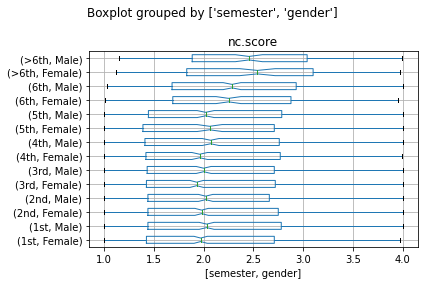

In [28]:
boxplots.boxplot(column = 'nc.score', by = ['semester','gender'], vert = False, notch=True)
plt.tight_layout()

Dieses Diagramm ist nicht so einfach zu interpretieren. Es scheint jedoch, dass die oben gemachte Beobachtung bestätigt wird: Studierende aus höheren Semestern ($>5$-tes) schneiden beim *Numerus clausus* tendenziell schlechter ab. Der Einfluss des Geschlechts auf die *Numerus-Clausus*-Werte ist jedoch nicht so eindeutig. Wir werden Methoden der **Inferenzstatistik** anwenden müssen, um zu beurteilen, ob diese Unterschiede *statistisch signifikant* sind oder ob diese Schwankungen um den Median auch rein zufällig sein könnten.

Zum Abschluss dieses Abschnitts und um auch einen Boxplot mit Ausreißern zu sehen, stellen wir die Variable `height` gegen die Variable `gender` dar.

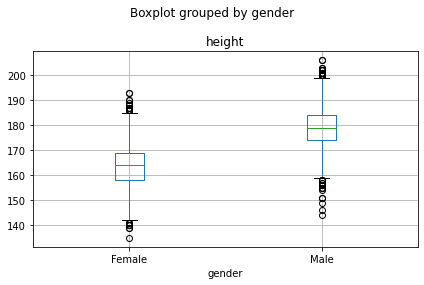

In [29]:
boxplots.boxplot(column = 'height', by = 'gender')
plt.tight_layout()

Offensichtlich, und sicherlich nicht unerwartet, gibt es einen Unterschied in der Größe der Studenten zwischen den verschiedenen Gruppen (männlich oder weiblich). Weibliche Studenten sind tendenziell kleiner als männliche, aber wenn wir uns die Extreme ansehen, gibt es in beiden Gruppen große und kleine Personen. Wie bereits erwähnt, müssen wir jedoch zunächst die Daten auf *statistische Signifikanz* prüfen, um sicher zu sein, dass der beobachtete Größenunterschied nicht nur zufällig ist.